# Imports

In [1]:
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing matplotlib
# for animations
from IPython import display # manipulate notebook output
from time import sleep # used to slow things down
from time import time
from matplotlib.animation import FuncAnimation # animate by repeatedly calling a functio
import random
from scipy import linalg
from scipy import fft
from scipy import integrate
from scipy.io.wavfile import read as wavread

# Fundamental Physical Constants (checkpoint 1.5)

The code bellow will load data into a very large string called data.

In [2]:
with open("allascii.txt") as f:
    data = f.read()

The program below finds the physical constant with the largest fractional uncertainty from the data (Uncertainty divided by Value). It then will print the name of that constant, along with its fractional uncertainty.

In [3]:
ds=data.split("\n") #splits data into a list where each component is a new line
df = ds[11:-1]#this takes out the first few lines that do not have any of the data actually in it
t = [] #defining a lsit that will be used later
max_uncertainty=0 #defining a variable that will be used later as the winning value for the uncertainty


for l in df:
    ls=[l[:59].strip()]#this takes the name from each line which will then be added to the tuple
    ls.append(l[60:85].replace("...","")) #this takes the value from the data and takes and takes out the three dots for the ones that have exponents
    ls.append(l[85:110].replace("(exact)","0"))#this adds the uncertainty to the list and for the ones where the uncertainty is exact it replaces the phrase exact with a zero
    ls.append(l[110:].strip())#this removes the spaces
    lt=tuple(ls)#this actually creates the tuple
    t.append(lt)#this is appending it to the previously defined list

    
for i in range(0, 352): #this is going through all of the values to find the fractional uncertainty
    fractional_uncertainty = (float(t[i][2].replace(" ",""))/(float(t[i][1].replace(" ",""))))#this calculates the fracional uncertainty by going through the list and turning the values from strings to floats
    if fractional_uncertainty>max_uncertainty: #this is how I am finding the fractional uncertainty which is the greatest value, it saves it if it beats the previous winner
        index = i #this saves the index of the leading fractional uncertainty so that I can print the name of the constant with the greatest fractional uncertainty
        max_uncertainty=fractional_uncertainty
  


print(max_uncertainty)
print(t[index][0])

0.002258141193249346
proton rms charge radius


# Planetary orbits (checkpoint 2.5)

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $\ell_1$ of closest approach that a planet makes to the Sun, also called its *perihelion*, and its linear velocity $v_1$ at perihelion (which is also it's maximum velocity), then any other property of the orbit can be calculated from these two as follows:

Kepler's second law tells us that the distance $\ell_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $\ell_2 v_2 = \ell_1 v_1$. At the same time, the total energy&mdash;kinetic plus gravitational&mdash;of a planet with velocity $v$ and distance $r$ from the Sun is given by
$$E = \frac12 m v^2 - G \frac{mM}{r}\,,$$
where $m$ is the planet's mass, $M=1.9891\times10^{30}$ kg is the mass of the sun, and $G=6.6738\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$ is Newton's gravitational constant. Given that energy must be conserved, it turns out that $v_2$ is the smaller root of the quadratic equation
$$v_2^2 - \frac{2GM}{v_1\ell_1} v_2 - \left[ v_1^2 - \frac{2GM}{\ell_1}\right] = 0\,.$$
Once we have $v_2$ we can calculate $\ell_2$ using the relation $\ell_2 = \ell_1 v_1/v_2$.

Given the values of $v_1$, $\ell_1$, and $\ell_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler's laws and the fact that the orbit is an ellipse:

>Semi-major axis: $a = \frac12(\ell_1+\ell_2)\,,$
>
>Semi-minor axis: $b = \sqrt{\ell_1\ell_2}\,,$
>
>Orbital period: $T = \displaystyle{\frac{2\pi ab}{\ell_1 v_1}}\,,$
>
>Orbital eccentricity: $e = \displaystyle{\frac{\ell_2-\ell_1}{\ell_2+\ell_1}}\,.$

For the eight planets in the solar system, the perihelion distance and perihelion velocity (maximum velocity) are given below. 

| Planet | Perihelion ($10^6$ km) | Max Velocity (km/s) |
|:-|:-:|:-:|
| Mercury | 46.00 | 58.98 |
| Venus | 107.48 | 35.26 |
| Earth | 147.09 | 30.29 |
| Mars | 206.62 | 26.50 |
| Jupiter | 740.52 | 13.72 |
| Saturn | 1352.55 | 10.18 |
| Uranus | 2741.30 | 7.11 |
| Neptune | 4444.45 | 5.50 |

The program below creates a file named `orbits.txt` that contains the following columns, with eight rows corresponding to the eight planets:
1. The planet's name
2. $\ell_1$ (in AU, where 1 AU is the average Earth-Sun distance = $a_\mathrm{Earth}$)
3. $\ell_2$ (in AU)
4. $v_1$ (in km/s)
5. $v_2$ (in km/s)
6. $a$ (in AU)
7. $b$ (in AU)
8. $T$ (in years)
9. $e$

In [4]:
with open("orbits.txt","w") as f: #opening txtfile to write
    
     #defining header and making it so that theyre ll spaces apart
    header= (("Planet").ljust(11)+ ("L1").ljust(11) + ("L2").ljust(11) 
             +("V1").ljust(11) + ("V2").ljust(11) +("a").ljust(11) 
             +("b").ljust(11) + ("T").ljust(11)+ str("e").ljust(11)) 
    
    f.write(header + "\n") #writing header
    
    planets=("Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune") #defining names of planets
    
    L1_km=[46.00e6,107.48e6,147.09e6,206.62e6,740.52e6,1352.55e6,2741.30e6,4444.45e6] #L1 in km
    V1=[58.98,35.26,30.29,26.50,13.72,10.18,7.11,5.50] #defining V1 in km/s
    M= 1.9891E30 #mass of sun
    G= 6.6738E-11 #defining G
   
    L1=[] #creating empty lists to append in for loop
    V2=[]
    L2=[]
    a=[]
    b=[]
    T=[]
    e=[]
    
    for i in range(len(L1_km)):
        L1.append(L1_km[i]*(6.68459e-9)) #L1 in au
        #using SI units to solve for V2
        coeff=[1,-(2*G*M/(V1[i]*1000*L1_km[i]*1000)),-(((V1[i]*1000)**2) -(2*G*M)/(L1_km[i]*1000))] 
        #defining coefficients for quadratic formula
        roots=(np.roots(coeff)) #solving for roots
        V2.append(min(roots)/1000) #Giving V2 in km/s
        L2.append((L1[i]*V1[i])/V2[i]) #giving L2 in au
        a.append((1/2)*(L1[i] + L2[i])) #giving a in au
        b.append(np.sqrt(L1[i]*L2[i])) #giving b in au
        T.append((2*np.pi*a[i]*b[i])/(L1[i]*(V1[i]*(6.68459e-9)))*3.17098e-8) #giving T in years 
        e.append((L2[i]-L1[i])/(L2[i]+L1[i])) #giving E
        
        
        
#Making it so that it'll print each value as strings that are evenly spaced up to 11 spaces with 3 decimal places
        
    for i in range(len(planets)): 
        f.write((planets[i]).ljust(11)+ format((L1[i]),".3f").ljust(11) + format((L2[i]),".3f").ljust(11) +
                format((V1[i]),".3f").ljust(11)+  format((V2[i]),".3f").ljust(11) + format(a[i],".3f").ljust(11)
                + format(b[i],".3f").ljust(11)+format(T[i],".3f").ljust(11)+format(e[i],".3f").ljust(11)+"\n")


In [5]:
#printing file
with open("orbits.txt") as file:
    print(file.read())

Planet     L1         L2         V1         V2         a          b          T          e          
Mercury    0.307      0.466      58.980     38.878     0.387      0.379      0.241      0.205      
Venus      0.718      0.728      35.260     34.797     0.723      0.723      0.615      0.007      
Earth      0.983      1.016      30.290     29.301     1.000      1.000      1.000      0.017      
Mars       1.381      1.665      26.500     21.989     1.523      1.516      1.880      0.093      
Jupiter    4.950      5.472      13.720     12.412     5.211      5.204      11.902     0.050      
Saturn     9.041      10.112     10.180     9.102      9.576      9.562      29.652     0.056      
Uranus     18.324     20.008     7.110      6.512      19.166     19.148     83.956     0.044      
Neptune    29.709     30.478     5.500      5.361      30.094     30.091     165.182    0.013      



# Kepler's Third Law (checkpoint 3.5)

 The program below uses a file called exoplanets.csv. It contains orbital and physical parameters for 2950 exoplanets.
 The program loads the data into arrays and verifies Kepler's 3rd Law,
$$T^2\propto\frac{a^3}{M}\,,$$
where $T$ is the period of the orbit, $a$ is the semimajor axis, and $M$ is the mass of the *star*. The proportionality constant is equal to 1 if the units of period are in years, the semi-major axis is in AU (astronomical units), and the mass of the star is in units of solar masses. 
Below is a plot of $a^3/M$ versus $T^2$ for values of $T$ overplotted with a straight line with slope 1 and y-intercept 0.

/var/folders/9m/3pk9t3314fvcfbflc8jn80xm0000gn/T/ipykernel_42713/2771821075.py:9: RuntimeWarning: invalid value encountered in divide
  func=a**3/m #defining function to plot


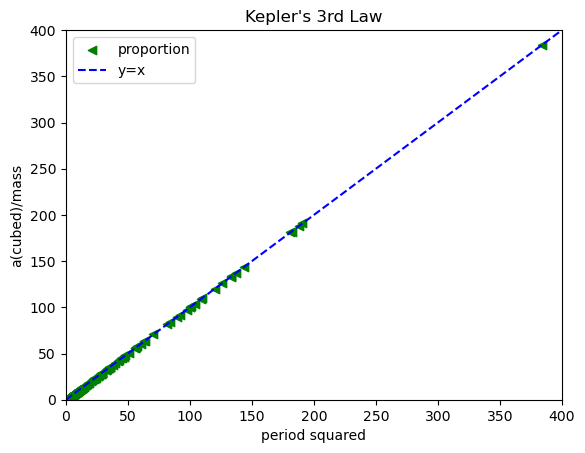

In [6]:
df=np.genfromtxt("exoplanets.csv",delimiter=',',names=True,usecols=(1,2,3)) 
#loading in csv file and delimiter splits each non-empty line into a sequence of strings
#names=true allows me to define collumns with the name of its header and usecols defines the columns i want

m=df["MSTAR"] #defining the columns 
a=df["A"]
p=df["PER"]/365 #dividing to get correct units

func=a**3/m #defining function to plot
T=p**2 #defining period squared

#plotting t vs func with a legend label and making it green with triangle markers
plt.scatter(T,func,label='proportion',color="g",marker='<') 
plt.xlim(0,400) #setting x and y lims
plt.ylim(0,400)

x=np.arange(0,400) #defining x 
y=x #defining y

plt.plot(x,y,linestyle="--",color="b",markersize=5,label='y=x') 
plt.legend(loc='upper left') #defining legend and its location
plt.xlabel('period squared') #defining x and y labels
plt.ylabel("a(cubed)/mass")
plt.title("Kepler's 3rd Law") #defining title
plt.show() #showing plot


# Waves in 2-D (checkpoint 4.5)

The equation
$$z(x,y) = z_0\sin\left(k\sqrt{x^2+y^2}-\omega t\right)$$
describes a circular set of waves centered on the origin that propagate outwards as time progresses. The program below creates an animated representation of this wave using $z_0=1$, $k=1$, and $\omega=1$.

In [7]:
t = 1
   
fig = plt.figure()

x_values = np.linspace(-25, 25, 500) #creating an array for the range of x and y values
y_values = np.linspace(-25, 25, 500)

x, y = np.meshgrid(x_values, y_values)

z = np.sin(np.sqrt(x**2+y**2)) #calculating the values for z

ax=plt.imshow(z, extent=(-25,25, -25, 25), cmap= "turbo") #plotting the graph initially
def animate(frame):

    z = np.sin(np.sqrt(x**2+y**2)-frame/50*2*np.pi) #calculating z for all of the different frames to make an animation with the right period so that it does not loop

    ax.set_data(z)
    
anim = FuncAnimation(fig, animate, frames =100 ,interval = 50) #setting the frames and intervals
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Diffusion-Limited Aggregation (checkpoint 5.5)

Brownian motion is the motion of a particle, such as a smoke or dust particle, as it is buffeted by random collisions with gas molecules. The program below is a simple computer simulation animation of such a particle in two dimensions. The particle is confined to a square grid or lattice $L \times L$ squares on a side, so that its position can be represented by two integers. It starts in the middle of the grid. On each step of the simulation it chooses a random direction (up, down, left, or right) and moves one step in that direction. This process is called a random walk. The particle takes 200 steps on a lattice with $L=25$.

In [8]:
fig=plt.figure()
plt.xlim(0, 25) #setting the x and y limits on the figure
plt.ylim(0, 25)

xc, yc = 13, 13 #initial values for the x and y coordinate

points = plt.scatter(xc, yc) #plotting the x and y coordinates
def animate(frame):
    rand = random.randint(1, 4) #getting a random integer from 0 to 4 that will decide which way it will step
    global xc
    global yc
  
    if rand == 1: #moves up
        yc += 1
    if rand == 2: #moves right
        xc += 1
    if rand == 3: #moves down
        yc -= 1
    if rand == 4: #moves left
        xc -= 1
    if xc>=26: #all of these are here in case the coordinate goes off of the limits, it constrains it
        xc-=1
    if yc>=26:
        yc-=1
    if xc<=-1:
        xc+=1
    if yc<=-1:
        yc+=1
    points.set_offsets([xc,yc]) #plots it
  
    
anim = FuncAnimation(fig, animate, frames = 200, interval = 100)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()




The program below reproduces one of the most famous models in computational physics, [diffusion-limited aggregation](https://en.wikipedia.org/wiki/Diffusion-limited_aggregation). The version of this done below is done by taking a square grid with a single particle in the middle. The particle performs a random walk from square to square on the grid until it reaches a point on the edge of the system, at which point it "sticks" to the edge, becoming anchored there and immovable. Then a second particle starts at the center and does a random walk until it
sticks either to an edge or to the other particle. Then a third particle starts, and so on. Each particle starts at the center and walks until it sticks either to an edge or to any anchored particle.

The program below is a modification of the one above on a $101 \times 101$ grid that repeatedly introduces a new particle at the center and has it walk randomly until it sticks to an edge or an anchored particle.
The program is set up so that it generates a total of 1000 particles.

In [10]:
fig=plt.figure() #same process as above but different L value
L=101
plt.xlim(0,101)
plt.ylim(0,101)
x,y=L/2,L/2
points=plt.scatter(x,y)

anchors=[] #creating empty list for anchors
def animate(frame):
    global L,anchors
    b=0 #resetting b for each frame 
    x,y=L/2,L/2 #starting point for particles
    
    while b==0: #while loop so that b changes when particle is on edge or reaches another particle
        rand = random.randint(1,4)
        if rand==1:
            x+=1
        elif rand==2:
            x-=1
        elif rand==3:
            y+=1
        elif rand==4:
            y-=1  
        if (x>=L) or (x<=0) or (y>=L) or (y<=0): #boundaries
            b=1  
        if frame != 0: #exits while loop if particles are next to anchors. Doesn't apply to frame=0
            if [x,y+1] in anchors or [x,y-1] in anchors or [x+1,y] in anchors  or [x-1,y] in anchors:
                b=1          
    anchors.append([x,y]) #appening particles to anchors
    points.set_offsets((anchors)) #plotting 
    

anim = FuncAnimation(fig, animate, frames=1000, interval=50)
video = anim.to_html5_video()
html = display.HTML(video)

display.clear_output(wait=True)
display.display(html)
plt.close()
plt.show()

# Calculating Shadows (checkpoint 6.5)

The program below uses a file that contains an [STM](https://en.wikipedia.org/wiki/Scanning_tunneling_microscope) image of the surface of silicon, stored as a 2-D array with the goal of enhancing the image by calculating how it would look illuminated by a fixed light source, with a scaling, the distance between grid points, of 2.5 (arbitrary units) in this case.

When light strikes a surface, the amount falling per unit area depends not only on the intensity of the light, but also on the angle of incidence. The resulting intensity of illumination is $a\cos\theta$, where $a$ is the raw
intensity of the light. This simple physical law allows us to calculate how light falls on three-dimensional objects and hence how they will look when illuminated from various angles.

Suppose, for instance, that we are looking down on the silicon from above. We know the height of the surface $w(x,y)$ as a function of position in the plane, so the equation for the surface is simply $z=w(x,y)$, or equivalently $z-w(x,y)=0$, and the normal
vector $\vec{v}$ to the surface is given by the gradient of $z-w(x,y)$ thus:

$$\vec{v} = \vec{\nabla} [z-w(x,y)] = \begin{pmatrix}\partial/\partial x \\ \partial/\partial y \\ \partial/\partial z \end{pmatrix} [z-w(x,y)] = \begin{pmatrix}-\partial w/\partial x \\ -\partial w/\partial y \\ 1 \end{pmatrix}\,.$$

Now suppose we have light coming in represented by a vector $\vec{a}$ with magnitude equal to the intensity of the light. Then the dot product of the vectors $\vec{a}$ and $\vec{v}$ is

$$\vec{a}\cdot\vec{v} = |\vec{a}|\,|\vec{v}|\cos\theta\,,$$

where $\theta$ is the angle between the vectors. Thus the intensity of illumination of the surface is

$$I = |\vec{a}| \cos\theta = \frac{\vec{a}\cdot\vec{v}}{|\vec{v}|} = \frac{-a_x (\partial w/\partial x) - a_y (\partial w/\partial y) + a_z}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}\,.$$

In turn, the illumination can be expressed in terms of a pair of angles that describe the location of the sun in the sky:

$$\vec{a}=(\cos\theta\cos\phi,\,\cos\theta\sin\phi,\,\sin\theta)\,,$$

where $\theta$ represents the altitude angle, and $\phi$ represents the azimuthal angle (measured counterclockwise from the $+x$-axis). For simplicity, we've choosen to set the magnitude $|\vec{a}|=1$.

The program below calculates the intensity for each grid point using derivatives, with $\theta=20^\circ$ and $\phi=30^\circ$. It then creates a density plot of the resulting values in which the brightness at each point depends on the corresponding intensity value.

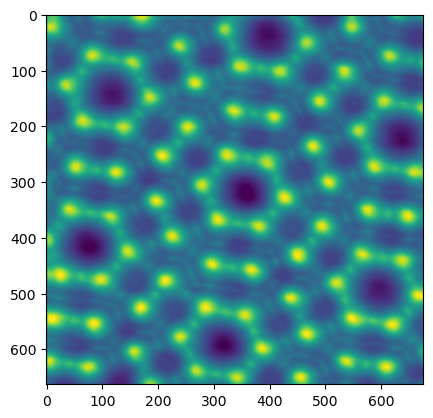

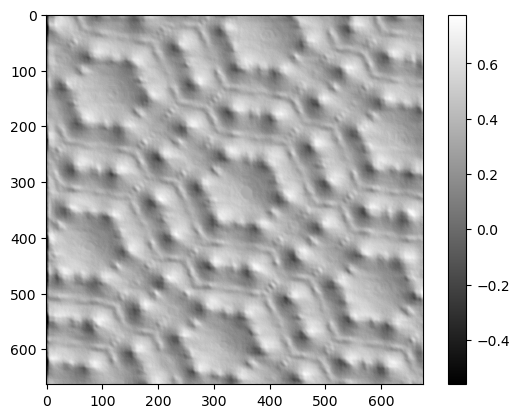

In [11]:
file=np.loadtxt('stm.txt') #loading file

plt.imshow(file) #plotting before taking gradient
plt.show()

dwdy1, dwdx = np.gradient(file,2.5) #taking gradient of file
dwdy=-dwdy1 #inverting y derivative 

theta=20 #defining theta and phi
phi=30

ax=np.cos(np.deg2rad(theta))*np.cos(np.deg2rad(phi)) #defining  ax
ay=np.cos(np.deg2rad(theta))*np.sin(np.deg2rad(phi)) #defining ay
az=np.sin(np.deg2rad(theta)) #defining az

I= (-ax*dwdx-ay*dwdy+az)/np.sqrt(dwdx**2+dwdy**2+1) #calculating I

plt.imshow(I,cmap="gist_gray") #plotting I with gray colormap
plt.colorbar() #adding colorbar
plt.show() #showing plot

# Eigenfrequencies (checkpoint 7.5)

Let's consider a chain of four identical masses connected by five ideal springs and we will neglect the effects of gravity for simplicity. The program below creates an animation that shows the chain vibrating horizontally at each of its four *eigenfrequencies*.

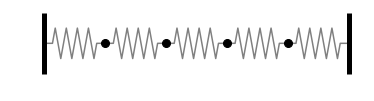

Let $x_0$, $x_1$, $x_2$, and $x_3$ be the horizontal displacement of each mass from equilibrium, numbered from left to right. The four equations of motion of the masses are given by

$$\begin{align*}
-2kx_0 + kx_1 &= m\ddot{x}_0\,, \\
kx_0 - 2kx_1 + kx_2 &= m\ddot{x}_1\,, \\
kx_1 - 2kx_2 + kx_3 &= m\ddot{x}_2\,, \\
kx_2 - 2kx_3 &= m\ddot{x}_3\,.
\end{align*}$$

In order to find the eigenfrequencies $\omega$ of the system, we assume the solution to a simple harmonic oscillator takes the form $\ddot{x}_i = -\omega^2 x_i$ which puts the equations above into the form

$$\mathbf{Mx}=\frac{\omega^2}{\omega_0^2}\mathbf{x}\,,$$

where $\mathbf{M}$ is a matrix with the coefficients from the equation of motion and $\omega_0=\sqrt{k/m}$ is the natural frequency of each spring. We choose units where $\omega_0 = 1$. We are thus left with an eigenvalue problem

$$\mathbf{Mx}=\omega^2\mathbf{x}\,$$

where $\omega$ are the angular *eigenfrequencies* 

The significance of these eigenfrequencies is that when the chain is driven at an arbitrary frequency $\omega$, all four masses move with that same frequency, but different amplitudes and phases. However, if the system is driven at an eigenfrequency, the resulting amplitudes are all real

$$x_j(t) = A_j \cos(\omega t)\,,$$

where the real amplitudes $A_j$ are the values of the eigenvector associated with eigenfrequency $\omega$.

The animation below shows the chain moving at each of its four eigenfrequencies.


In [12]:
def draw_spring(left, right,ax):
    """
    Draws a horizontal spring.
    Inputs: left  = x-coord of left side
            right = x-coord of right side
    """
    dy = 0.5
    x = np.linspace(left, right, 23)
    y = np.array([0]*4 + [dy, 0, -dy, 0]*4 + [0]*3) # zig-zag shape for spring
    spring = plt.Line2D(x, y, linestyle="-", color="gray", zorder=-1)
    #ax = plt.gca()                      #                        ^
    ax.add_line(spring)                 # draw behind everything else


def draw_chain(x_offsets,ax):
    """
    Draw a chain of five springs and four masses.
    Input: x_offsets = array of displacements from equilibrium
    """
    x = np.arange(2, 10, 2) + x_offsets
    
    # draw springs
    draw_spring(0, x[0],ax)
    draw_spring(x[0], x[1],ax)
    draw_spring(x[1], x[2],ax)
    draw_spring(x[2], x[3],ax)
    draw_spring(x[3], 10,ax)
    
    # draw masses
    ax.plot(x, [0, 0, 0, 0], "ko", ms=8)
    
    # draw vertical bars at edges
    ax.vlines([0, 10], -1, 1, "k", lw=5)


In [13]:
A=np.array([[2,-1,0,0], 
            [-1,2,-1,0],
            [0,-1,2,-1],
            [0,0,-1,2]])
wsq,v=linalg.eig(A) # calculating eigenvalues and eigenvectors
ws=np.real(np.sqrt(wsq))
fig,axs =plt.subplots(4,1) # creating the subplots

def animate(frame):
    for i in range(4): # plotting each of the springs on the correct axis
        ax=axs[i]
        A=v[:,i]
        w=ws[i]
        t=frame/20
        ax.cla()
        draw_chain(np.cos(w*t)*A,ax) #plotting using the correct frequency
        ax.axis("off") 
        ax.axis("scaled")

anim = FuncAnimation(fig, animate, frames=204, interval=20)
video = anim.to_html5_video()
html = display.HTML(video) ##copied from lecture
display.display(html)
plt.close()
plt.show()

# Fourier Transform of Sound (checkpoint 9.5)

The program below uses a file named trumpet.txt. It contains the waveform of a trumpet playing the note C 5  (with a frequency of 523.251 Hz). It reads the file into an array and plots the waveform. 

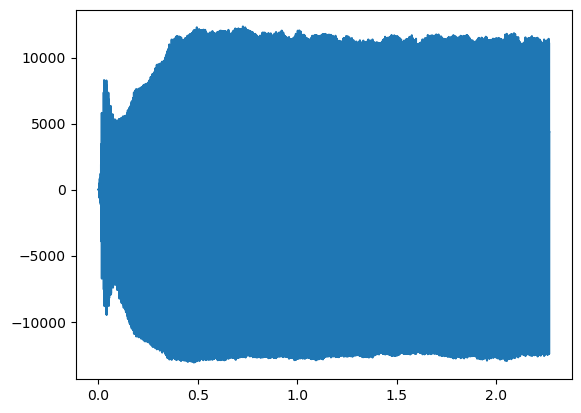

In [17]:
trumpet=np.loadtxt("trumpet.txt",unpack=True) #loading in txt

x = np.linspace(0, 100000/44100, 100000) #defining x
plt.plot(x, trumpet) # plotting x vs the trumpet
plt.show()
display.Audio(trumpet, rate=44100)


The program below calculates the Fourier transform of the trumpet's waveform, and plots the power spectrum of the Fourier coefficients ($|c_k|^2$) for frequencies between zero and 4000 Hz. The harmonics are the peaks at multiples  523.251 Hz.

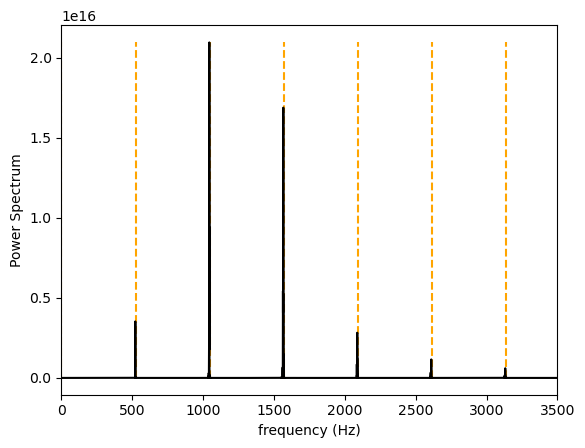

In [18]:
c = fft.fft(trumpet) #fourier transforming

power_spectrum = abs(c)**2 #calculating the power spectrum

f = np.linspace(0, 44100, 100000) #creating f
w = np.arange(0, 5000, 523.251)

plt.vlines(w, ymin=0, ymax=2.1e16, linestyle="--", color = "orange") #plotting the vlines
plt.plot(f, power_spectrum, color="black") # plotting f vs the power spectrum
plt.xlim(0,3500)
plt.xlabel("frequency (Hz)") #labelling
plt.ylabel("Power Spectrum")
plt.show()

The code blow uses the file StarWars.wav, that contains the first few seconds of the Star Wars theme.

The program below loads the .wav file into an array and displays the first chord by using array slicing. In addition, it plots the power spectrum of the first chord in the Star Wars theme while showing the frequencies ranging from zero to 2000 Hz and identifing several frequencies on the power spectrum. 

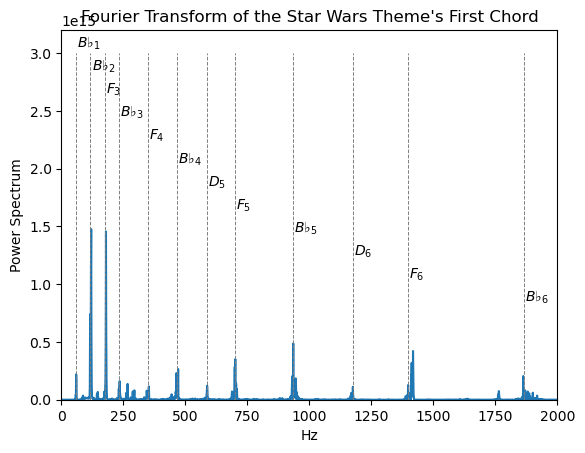

In [21]:
rate, data = wavread('StarWars.wav') #had to delete the space

data = data[20000:60000] # getting the first chord, slicing 
c = fft.fft(data) # DFT of the waveform
powerSpectrum = abs(c)**2 # Calculating the power spectrum

N = len(powerSpectrum)
n = np.arange(N)
T = N/44100
f = n/T #frequency in 1/s

plt.plot(f, powerSpectrum) # Plotting the power spectrum

harmonics = [58.27047, 116.5409, 174.6141, 233.0819, 349.2282, 466.1638, 587.3295, 698.4565,
             932.3275, 1174.659, 1396.913, 1864.655] #Manually found the harmonics using wikipedia

plt.vlines(harmonics, 0, 3e15, colors='gray', linestyles='dashed', linewidth=0.7) # Plot vertical lines at each harmonic

notes = [r'$B\flat_{1}$', r'$B\flat_{2}$', r'$F_{3}$', r'$B\flat_{3}$', r'$F_{4}$', r'$B\flat_{4}$',
         r'$D_{5}$', r'$F_{5}$', r'$B\flat_{5}$', r'$D_{6}$', r'$F_{6}$', r'$B\flat_{6}$'] #notes, this is a B flat chord

for i, note in enumerate(notes):
   plt.annotate(note, (harmonics[i]+5, 3.05e15-2e14*i)) #looping to label each note


plt.xlim(0, 2000) #plotting 
plt.ylim(0, 3.2e15)
plt.xlabel('Hz') #labeling
plt.ylabel('Power Spectrum')
plt.gca().set_title("Fourier Transform of the Star Wars Theme's First Chord")
plt.show()

# Double Pendulum (checkpoint 10.5)

A double pendulum consists of a normal pendulum with another pendulum hanging from its end. For simplicity we ignore friction, and assume that both pendulums have bobs of the same mass $m$ and massless arms of the same length $\ell$. Thus the setup looks like this:

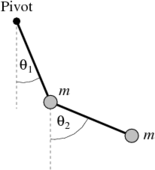

The position of the arms at any moment in time is uniquely specified by the two angles $\theta_1$ and $\theta_2$.  The equations of motion for the angles are most easily derived using the Lagrangian formalism. The resulting pair of equations are

$$\begin{align}
2\ddot\theta_1 + \ddot\theta_2 \cos(\theta_1-\theta_2) &+ \dot\theta_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\ddot\theta_2 + \ddot\theta_1 \cos(\theta_1-\theta_2) &- \dot\theta_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$

These are second-order equations, but we can convert them into first-order ones by the usual method, defining two new variables, $\omega_1$ and $\omega_2$, thus:

$$\dot\theta_1 = \omega_1,\qquad \dot\theta_2 = \omega_2\,.$$

In terms of these variables our equations of motion become

$$\begin{align}
2\dot\omega_1 + \dot\omega_2 \cos(\theta_1-\theta_2) &+ \omega_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\dot\omega_2 + \dot\omega_1 \cos(\theta_1-\theta_2) &- \omega_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$

Finally we have to rearrange these into the standard form with a single derivative on the left-hand side of each one, which gives

$$\begin{align*}
\dot\omega_1 &= - {\omega_1^2\sin(2\theta_1-2\theta_2) + 2\omega_2^2\sin(\theta_1-\theta_2) + (g/\ell) \bigl[ \sin(\theta_1-2\theta_2) + 3 \sin\theta_1 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}, \\ \\
\dot\omega_2 &= {4\omega_1^2\sin(\theta_1-\theta_2) + \omega_2^2\sin(2\theta_1-2\theta_2) + 2(g/\ell) \bigl[ \sin(2\theta_1-\theta_2) - \sin\theta_2 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}.
\end{align*}$$


These two equations, along with the equations $\dot{\theta}_1=\omega_1$ and $\dot{\theta}_2=\omega_2$, give us four first-order equations which between them define the motion of the double pendulum.

The program below solves the equations of motion from $t=0$ to $t=60$ seconds for the case where $\ell=0.4$ meters, with the initial conditions $\theta_1=\theta_2=\pi$ rad, $\omega_1=0$, and $\omega_2=0.001$ rad/s.

The mechanical energy of the system is given by

  $$E = m\ell^2 \bigl[ \omega_1^2 + \tfrac12 \omega_2^2 + \omega_1\omega_2 \cos(\theta_1-\theta_2) \bigr] - mg\ell(2\cos\theta_1 + \cos\theta_2)\,.$$

The program below also calculates the total energy of the system assuming that the mass $m=1$ kg, and makes a graph of energy as a function of time from $t=0$ to $t=60$ seconds.

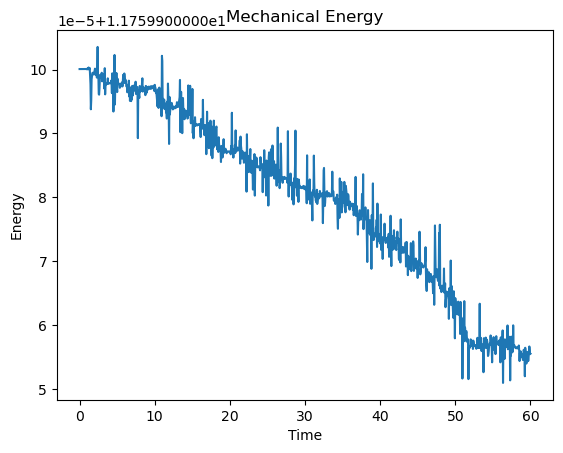

In [22]:
l = 0.4 #defining constants
g = 9.8

def f(t, r):
    w1, w2, theta1, theta2 = r #breaking apart r then defining the derivatives below
    dw1 = -(w1**2*np.sin(2*theta1-2*theta2) + 2*w2**2*np.sin(theta1-theta2) + 
            (g/l)*(np.sin(theta1 - 2*theta2)+3*np.sin(theta1)))/(3-np.cos(2*theta1-2*theta2))
    dw2 = (4*w1**2*np.sin(theta1-theta2) + w2**2*np.sin(2*theta1-2*theta2) + 
           2*(g/l)*(np.sin(2*theta1 - theta2)-np.sin(theta2)))/(3-np.cos(2*theta1-2*theta2))
    dtheta1 = w1
    dtheta2 = w2
    return dw1, dw2, dtheta1, dtheta2 #returning them

theta1val = theta2val = np.pi # defining initial conditions
w1val, w2val = 0, 0.001

# solve ivp for the function
sol = integrate.solve_ivp(f, (0, 60), (w1val, w2val, theta1val, theta2val), t_eval=np.linspace(0, 60, 1200), method="Radau", rtol=1e-6) #solving

w1, w2, theta1, theta2 = sol.y
E = l**2*(w1**2 + 0.5*w2**2 + w1*w2*np.cos(theta1-theta2)) - g*l*(2*np.cos(theta1)+np.cos(theta2)) #calculating E
t = sol.t

plt.plot(t,E)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Mechanical Energy")
plt.show()

The program below creates an animation of the motion of the double pendulum that moves in real time.

In [23]:
def RK4(f, x, t, h): #defining 4th order Runge Kutta function
    """
    Given a function f(x,t) and scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

fig = plt.figure(figsize=(8,8)) #creating the figure
line, = plt.plot([], "o-k")
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.axis("scaled")

def radtocart(theta):
    return np.sin(theta), np.cos(theta)

def animate(frame): #creating the animate function
    p1 = radtocart(theta1[frame])
    p2 = radtocart(theta2[frame])
    x = np.array([0, p1[0], p1[0]+p2[0]])
    y = np.array([1, 1-p1[1], 1-p1[1]-p2[1]])
    line.set_data(x,y)
    
    
anim = FuncAnimation(fig, animate, frames = 1200, interval=50)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Time-Dependent Schrödinger Equation (checkpoint 11.5)

Perhaps the most important partial differential equation, at least for physicists, is the Schr&ouml;dinger equation. In one dimension the Schr&ouml;dinger equation for a particle of mass $m$ with no potential energy reads

$$-\frac{\hbar^2}{2m} \frac{\partial^2\psi}{\partial x^2} = \mathrm{i}\hbar \frac{\partial\psi}{\partial t}\,.$$

In units where $\hbar/2m=1$, the equation simplifies to

$$-\frac{\partial^2\psi}{\partial x^2} = \mathrm{i}\frac{\partial\psi}{\partial t}\,.$$

For simplicity, let's put our particle in a box with impenetrable walls, so that we only have to solve the equation in a finite-sized space. The box forces the wavefunction $\psi$ to be zero at the walls, which we'll put at $x=0$ and $x=L$.

Replacing the second derivative in the Schr&ouml;dinger equation with a finite difference and applying the forward Euler method, we get the FTCS equation

$$\psi(x,t+h) = \psi(x,t) + h \frac{\mathrm{i}}{a^2} \bigl[ \psi(x+a,t) + \psi(x-a,t) - 2\psi(x,t) \bigr]\,,$$

where $a$ is the spacing of the spatial grid points and $h$ is the size of the time-step. Performing a similar step in reverse, we get the
backward Euler method

$$\psi(x,t+h) - h \frac{\mathrm{i}}{a^2} \bigl[ \psi(x+a,t+h) + \psi(x-a,t+h) - 2\psi(x,t+h) \bigr] = \psi(x,t)\,.$$

And taking the average of these two, we get the Crank-Nicolson equation for the Schr&ouml;dinger equation:

$$\begin{align}
\psi(x,t+h) - h \frac{\mathrm{i}}{2a^2} \bigl[ &\psi(x+a,t+h) + \psi(x-a,t+h) - 2\psi(x,t+h) \bigr]\\
  &= \psi(x,t) + h \frac{\mathrm{i}}{2a^2} \bigl[ \psi(x+a,t) + \psi(x-a,t) - 2\psi(x,t) \bigr]\,.
\end{align}$$

This gives us a set of simultaneous equations, one for each grid point.

The boundary conditions on our problem tell us that $\psi=0$ at $x=0$ and $x=L$ for all $t$. In between these points we have grid points at $a$, $2a$, $3a$, and so forth. Let us arrange the values of $\psi$ at these interior points into a vector

$$ \boldsymbol{\psi}(t) = \begin{pmatrix} \psi(a,t) \\ \psi(2a,t) \\ \psi(3a,t) \\ \vdots \end{pmatrix}\,.$$

Then the Crank-Nicolson equations can be written in the form

$$\mathbf{A}\,\boldsymbol{\psi}(t+h) = \mathbf{B}\,\boldsymbol{\psi}(t)\,,$$

where the matrices $\mathbf{A}$ and $\mathbf{B}$ are both symmetric and tridiagonal:

$$\mathbf{A} = \begin{pmatrix} a_1 & a_2 \\
                         a_2 & a_1 & a_2 \\
                             & a_2 & a_1 & a_2 \\
                             &     & a_2 & a_1 \\
                             &     &     &     & \ddots
\end{pmatrix},\qquad\qquad
\mathbf{B} = \begin{pmatrix} b_1 & b_2 \\
                             b_2 & b_1 & b_2 \\
                                 & b_2 & b_1 & b_2 \\
                                 &     & b_2 & b_1 \\
                                 &     &     &     & \ddots
\end{pmatrix}\,,$$

with

$$ a_1 = 1 + \mathrm{i}\frac{h}{a^2},\qquad a_2 = - \mathrm{i}\frac{h}{2a^2},\qquad b_1 = 1 - \mathrm{i}\frac{h}{a^2},\qquad b_2 = \mathrm{i}\frac{h}{2a^2}\,.$$

The equation $\mathbf{A}\,\boldsymbol{\psi}(t+h) = \mathbf{B}\,\boldsymbol{\psi}(t)$ has precisely the form $\mathbf{A}\mathbf{x} = \mathbf{v}$ of the simultaneous equation problems we studied in Chapter 6 and can be solved using the same methods. Specifically, since the matrix $\mathbf{A}$ is tridiagonal in this case, we can use the fast tridiagonal version of Gaussian elimination.

The last piece we need are the initial conditions. Suppose that at time $t=0$ the wavefunction of the electron has the form

$$\psi(x,0) = \exp \biggl[ -\frac{(x-x_0)^2}{2\sigma^2} \biggr]e^{\mathrm{i}\kappa x}\,,$$

where

$$x_0 = \frac{L}{2},\qquad \sigma = \frac{L}{10},\qquad \kappa = \frac{50}{L}\,,$$

and $\psi=0$ on the walls at $x=0$ and $x=L$. (This expression for $\psi(x,0)$ is not normalized&mdash;there should really be an overall multiplying coefficient to make sure that the probability density for the electron integrates to unity. It's safe to drop the constant, however, because the Schr&ouml;dinger equation is linear, so the constant cancels out on both sides of the equation and plays no part in the solution. 

The code below is a program that performs the Crank-Nicolson method for this electron, calculating the vector $\boldsymbol{\psi}(t)$ of values of the wavefunction for each time step between $t=0$ and $t=0.1$. It uses the initial wavefunction above and $N=1001$ spatial grid points, so that $a=L/1000$. Since everything scales with $L$, the easiest approach is to set $L=1$.

The program below creates an animation of the time evolution of the probability density $|\psi(x,t)|^2$ for the particle.

In [24]:
L = 1 #defining constants
N = 1001
a = L/(N-1)
x0 = L/2
sigma = L/10
k = 50/L
h = 1e-4
x = np.linspace(0,1,N)

psi0 = np.exp(-(x-x0)**2/(2*sigma**2))*np.exp(1j*k*x) #defining psi0
psi0[0] = 0
psi0[N-1] = 0

a1 = 1+1j*h/a**2 #defining a1, a2, b1, b2 
a2 = -1j*h/(2*a**2)
b1 = 1-1j*h/a**2
b2 = 1j*h/(2*a**2)

v = np.zeros(1001,dtype=complex) #creating zero array
for i in range(N-1): #solving for v_i
    v[i] = b1*psi0[i]+b2*(psi0[i+1]+psi0[i-1])


A1 = np.full(shape=N,fill_value=a1) #creating A matrix and solving for x
A2 = np.full(shape=N,fill_value=a2)
A2_up = A2
A2_up[0] = 0
A2_down = A2
A2_down[N-1] = 0
A = np.array([A2_up, A1, A2_down])
x_vec = linalg.solve_banded((1,1),A,v)

psi = [psi0, x_vec] #inputting first two steps

for n in range(N-2): #repeating for rest of psi values
    for i in range(len(v)-1):
        v[i] = b1*psi[n][i]+b2*(psi[n][i+1]+psi[n][i-1])
    xvec = linalg.solve_banded((1,1),A,v)
    psi.append(xvec)
    
prob = [] #solving for probability density
for amp in psi:
    prob.append(abs(amp)**2)


fig = plt.figure() #defining figure for animation
plt.xlim(0,L)
plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel(r"$|\psi|^{2}$")
plt.title(r"$|\psi(t)|^{2}$")

frames = 1000
interval = 25

curve, = plt.plot([]) #empty curve



def animate(frame):
    curve.set_data((x,prob[frame]))

anim = FuncAnimation(fig, animate, frames=frames, interval=interval)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()